Train Accuracy 0.35287227278076666
Test Accuracy 0.34688116213910625
Stdev of accuracy on Train 0.023056893793867796
Stdev of accuracy on Test 0.019681268102401214


Text(0.5, 1.0, 'GNB Classifier')

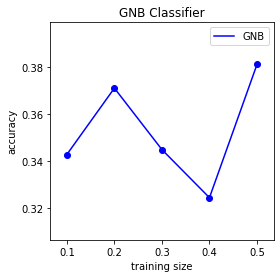

In [12]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
import matplotlib.pyplot as plt
import os

def PCA(data):
    '''
    Input: data
    output: Eigen Value-Vector pair, variance explained by components
    '''
    #Calculating Eigen values and Eigen vectors 
    values,vectors=np.linalg.eig(data.cov())
    # binding values and vector in a tuple
    eig_pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]
    #soring according to larger Eigen Values
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    # Variance explaied 
    var_exp = [(i / sum(values))*100 for i in sorted(values, reverse=True)]
    variance_exp=np.cumsum(var_exp)
    return eig_pairs,variance_exp

def PCA_transform(data,eig_pairs,k):
    '''
    Input: data,Eigen Value-Vector pair from PCA(), # principle components to use
    output : transformed data
    '''
    W=[]
    for i in range(k):
        W.append(eig_pairs[i][1])
    W=np.array(W)
    
    return np.dot(data,W.T)

data = pd.read_csv('avila-tr.txt', sep=",", header=None)
num_samples=data.shape[0]

x = data.iloc[:,0:10];
y = data.iloc[:,-1];

acc_train = [];
acc_test=[];
trainsize = [0.10,0.20,0.30,0.40,0.50];

#scaling
scaler.fit(x)
x =pd.DataFrame(scaler.transform(x),index=x.index , columns=x.columns)
#train_df_sc has 9 columns


#label encoding
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

#PCA
eig_pairs,variance_exp = PCA(x)

#PCA transformation
x =PCA_transform(x,eig_pairs,8)

for i in trainsize:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=i)

    GNB =  GaussianNB();
    GNB.fit(x_train,y_train);
    acc_test.append(GNB.score(x_test,y_test));
    acc_train.append(GNB.score(x_train,y_train));

print("Train Accuracy",statistics.mean(acc_train));
print("Test Accuracy",statistics.mean(acc_test));

print("Stdev of accuracy on Train",statistics.stdev(acc_train));
print("Stdev of accuracy on Test",statistics.stdev(acc_test));

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainsize,acc_train,color='blue')
plt.plot(trainsize,acc_train,color='blue',label ='GNB')
plt.legend()
plt.xlabel('training size')
plt.ylabel('accuracy')
plt.title('GNB Classifier')